# Protótipo de Controlador Fuzzy

* exemplo simples de controlador fuzzy tirado da internet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctl

In [2]:
# eixo das abscissas para as funções de pertinência

preco = ctl.Antecedent(np.arange(0, 41, 1), 'preço')
vol = ctl.Antecedent(np.arange(0, 1001, 1), 'volume')
dec = ctl.Consequent(np.arange(0, 1001, 1), 'decisao')

C:\Users\victo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(30, 0.8, 'caro')

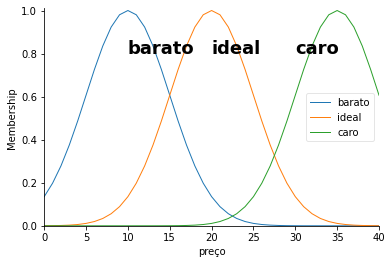

In [3]:
# funções de pertinência para os preços

preco['barato'] = fuzz.gaussmf(preco.universe, 10, 5)
preco['ideal'] = fuzz.gaussmf(preco.universe, 20, 5)
preco['caro'] = fuzz.gaussmf(preco.universe, 35, 5)
preco.view()
plt.text(x = 10, y = 0.8, s = 'barato', fontsize = 18, weight = 'bold')
plt.text(x = 20, y = 0.8, s = 'ideal', fontsize = 18, weight = 'bold')
plt.text(x = 30, y = 0.8, s = 'caro', fontsize = 18, weight = 'bold')

C:\Users\victo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(850, 0.8, 'alto')

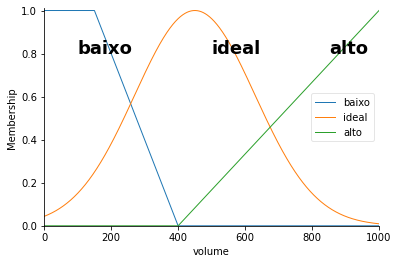

In [4]:
# funções de pertinência para os volumes

vol['baixo'] = fuzz.trapmf(vol.universe, [0, 0, 150, 400])
vol['ideal'] = fuzz.gaussmf(vol.universe, 450, 180)
vol['alto'] = fuzz.trimf(vol.universe, [400, 1000, 1000])
vol.view()
plt.text(x = 100, y = 0.8, s = 'baixo', fontsize = 18, weight = 'bold')
plt.text(x = 500, y = 0.8, s = 'ideal', fontsize = 18, weight = 'bold')
plt.text(x = 850, y = 0.8, s = 'alto', fontsize = 18, weight = 'bold')

C:\Users\victo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(850, 0.8, 'vender')

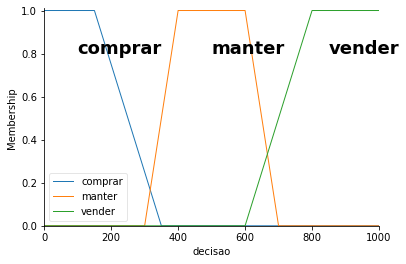

In [5]:
# funções de pertinência para a decisão final

dec['comprar'] = fuzz.trapmf(dec.universe, [0, 0, 150, 350])
dec['manter'] = fuzz.trapmf(dec.universe, [300, 400, 600, 700])
dec['vender'] = fuzz.trapmf(dec.universe, [600, 800, 1000, 1000])
dec.view()
plt.text(x = 100, y = 0.8, s = 'comprar', fontsize = 18, weight = 'bold')
plt.text(x = 500, y = 0.8, s = 'manter', fontsize = 18, weight = 'bold')
plt.text(x = 850, y = 0.8, s = 'vender', fontsize = 18, weight = 'bold')

In [6]:
# regras da lógica fuzzy

regra1 = ctl.Rule(preco['barato'] & vol['baixo'], dec['comprar'])
regra2 = ctl.Rule(preco['barato'] & vol['alto'], dec['comprar'])
regra3 = ctl.Rule(preco['ideal'] | vol['baixo'], dec['comprar'])
regra4 = ctl.Rule(preco['ideal'] | vol['ideal'], dec['manter'])
regra5 = ctl.Rule(preco['ideal'] | vol['alto'], dec['vender'])
regra6 = ctl.Rule(preco['caro'] | vol['alto'], dec['vender'])

# sistema de criação de controle/simulação

decisao_ctl = ctl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6])
decisao = ctl.ControlSystemSimulation(decisao_ctl)

In [7]:
# função de cálculo para desfuzzificação

def IndFzy(entrada):
    decisao.input['preço'] = entrada[0]
    decisao.input['volume'] = entrada[1]
    decisao.compute()
    return(decisao.output['decisao'])

671.986
[['comprar', 0.0], ['manter', 0.28014207563969995], ['vender', 0.35992896218015]]
decisão final: vender


C:\Users\victo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


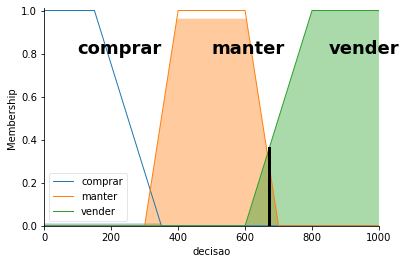

In [8]:
res1 = IndFzy([35, 400])
print(round(res1, 3))
dec.view(sim = decisao)
plt.text(x = 100, y = 0.8, s = 'comprar', fontsize = 18, weight = 'bold')
plt.text(x = 500, y = 0.8, s = 'manter', fontsize = 18, weight = 'bold')
plt.text(x = 850, y = 0.8, s = 'vender', fontsize = 18, weight = 'bold')

mval = []

for t in dec.terms:
    s = np.interp(res1, dec.universe, dec[t].mf)
    mval.append([t, s])
print(mval)
mval = pd.DataFrame(mval)
ind_max = mval[1].idxmax()
print('decisão final:', mval[0][ind_max])